In [61]:
import glob
import cv2
import matplotlib.pyplot as plt
from PIL import Image, ImageOps, ImageFilter
from skimage import data, io, filters
from skimage import feature as ft
from sklearn.model_selection import train_test_split
from sklearn import svm

## T1

In [22]:
# T1  start _______________________________________________________________________________
# Read in Dataset

# change the dataset path here according to your folder structure
dataset_path = "F:\\NUS SOC Summer Workshop\\Project 1_ Traffic Sign Recogniti\\Dataset_1\\images"

X = []
y = []
for i in glob.glob(dataset_path + '\\*.png', recursive=True):
    
    label = i.split("images")[1][1:4]
    y.append(label)
    # write code to read ecah file i, and append it to list X
    X.append(cv2.imread(i))


# you should have X, y with 5998 entries on each.
print(len(y))
print(len(X))
# T1 end ____________________________________________________________________________________

5998
5998


## T2

5998


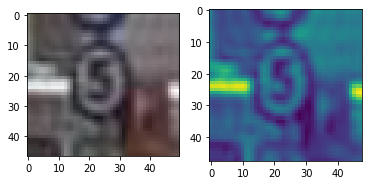

In [44]:
# T2 start __________________________________________________________________________________
# Preprocessing
X_processed=[]
for x in X:
    # Write code to resize image x to 48x48 and store in temp_x
    temp_x = cv2.resize(x, (48, 48))
    # Write code to convert temp_x to grayscale
    temp_x_gray = cv2.cvtColor(temp_x, cv2.COLOR_BGR2GRAY)
    # Append the converted image into X_processed
    X_processed.append(temp_x_gray)
# T2 end ____________________________________________________________________________________
fig = plt.figure()
fig.add_subplot(1, 2, 1)
plt.imshow(X[1])
fig.add_subplot(1, 2, 2)
plt.imshow(X_processed[1])
print(len(X_processed))

## T3

In [59]:
# T3 start __________________________________________________________________________________
# Feature extraction
X_features = []
for x in X_processed:
    x_feature = ft.hog(x, orientations=8, pixels_per_cell=(10, 10),cells_per_block=(1, 1), visualize=False, multichannel=False)
    X_features.append(x_feature)

# write code to Split training & testing sets using sklearn.model_selection.train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size = 0.2)

#T3 end ____________________________________________________________________________________
print(len(X_train),len(X_test),len(y_train),len(y_test))

4798 1200 4798 1200


## T4

In [64]:
#T4 start __________________________________________________________________________________
# train SVC
clf = svm.SVC()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9441666666666667